# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import zscore
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# LOADING DATA

In [2]:
data = pd.read_csv('avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
print('Shape of our data set is: ',data.shape)

Shape of our data set is:  (18249, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
#changing the format of the Date column into date-time and then creating indivisual column for
# year, month and day
#also removing the Date(as we are creating additional column for date and month ) and Unnamed: 0 column,
#as it is not useful for our model, it is only an index column for our data,Removing the day columns as well.

data['Date'] = pd.to_datetime(data['Date'])
data['month'] = pd.DatetimeIndex(data['Date']).month
data['Day'] = data['Date'].dt.dayofweek
data = data.drop(['Unnamed: 0','Date','Day'],axis=1)

In [7]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


# Checking for missing values

In [8]:
#looking for missing values
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

super! , with having 0 null values we will proceed with the Univariate, multivariate and Outlier analysis of our data

# UNIVARIATE  and BIVARIATE ANALYSIS

In [9]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [10]:
data.type.unique()

array(['conventional', 'organic'], dtype=object)

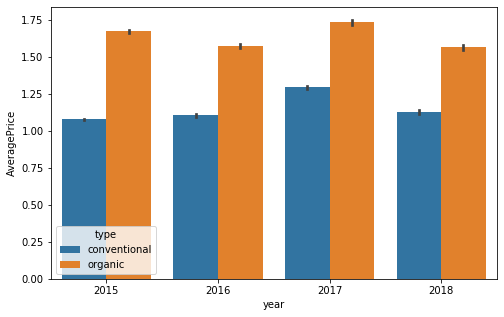

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='year',y='AveragePrice',hue='type',data=data)
plt.show()

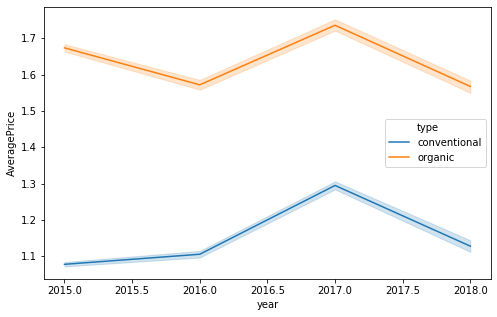

In [12]:
plt.figure(figsize=(8,5))
sns.lineplot(x='year',y='AveragePrice',hue='type',data=data)
plt.show()

in the above barplot and line plor it can be seen that the avg price of the organic avocado is higher than of the conventional, which is obvious,
Conventional is the opposite of Organic

Generally conventional methods of growing include the use of chemical pesticides, fertilizers and weed killers that are harmful to your health.
That is why the price of Organic, unharmful type is higher.

Price in 2017 was at peak for both organic and conventional type of avocado. Below I will be plotting the price region wise

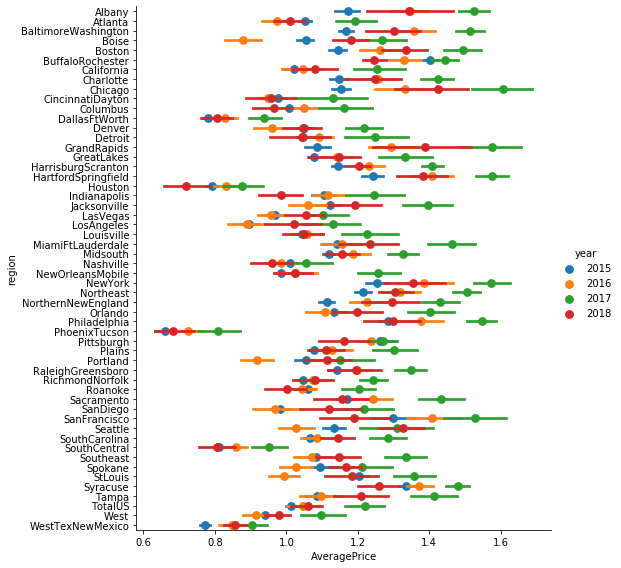

In [13]:
#lets see the Average price of the conventional and organic avocado in all the region over the years
        
sns.factorplot(x='AveragePrice',y='region',hue='year',data= data[data['type']=='conventional'],size=8,join=False)

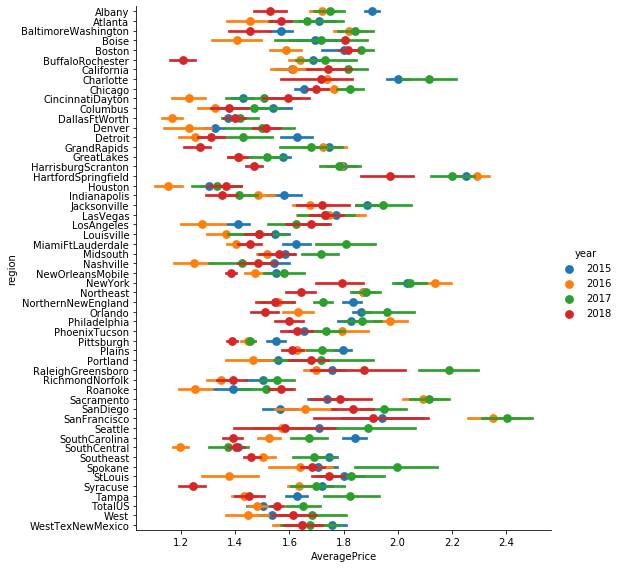

In [14]:
sns.factorplot(x='AveragePrice',y='region',hue='year',data= data[data['type']=='organic'],size=8,join=False)

from the above graphs,
CONVENTIONAL = we can see that the price in chicago is very hight, highest from all other region whereas Phoenix Tucson and Houston have low price

ORGANIC  = we can see that the price in SanFrancisco is very hight, highest from all other region whereas Houston have have low price
also it can be seen that in 2017 the price were the highest, in 2018 avg price is less than of 2017's.
The reason behing the high price increase was due to surging global demand and reduced harvests from major producers Mexico, Peru and California.

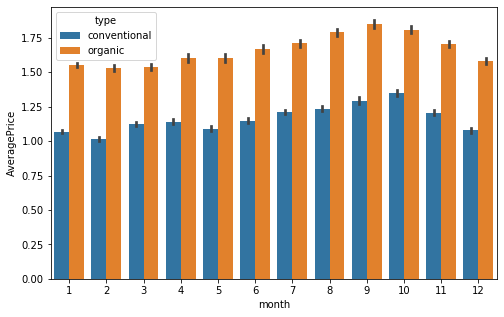

In [15]:
#checking the AveragePrice of the avocado of both types organic and conventional on monthly basis, 
#to check during what time of the year the price increases, it will show the peak season for Avocados.

plt.figure(figsize=(8,5))
sns.barplot(x='month',y='AveragePrice',hue='type',data=data)
plt.show()

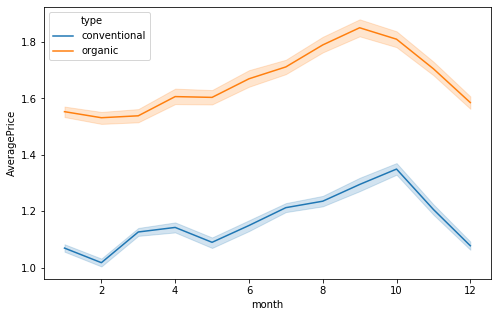

In [16]:
#checking the AveragePrice of the avocado of both types organic and conventional on monthly basis, 
#to check during what time of the year the price increases

plt.figure(figsize=(8,5))
sns.lineplot(x='month',y='AveragePrice',hue='type',data=data)
plt.show()

here we can see that the price gets increased from may to september.
from May to August/September it is a peak season for the demand of Avocado in US. The reason for high price could be due to less supply of Avocados, hence price is increased
source = http://blog.imperfectfoods.com/blog-1/2019/2/13/when-are-avocados-in-season

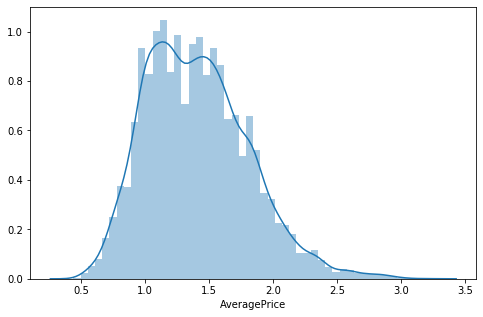

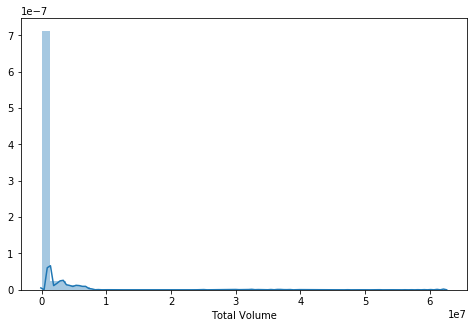

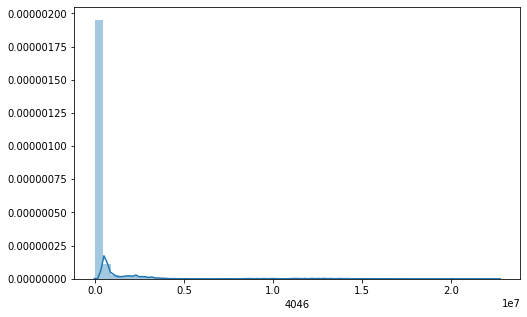

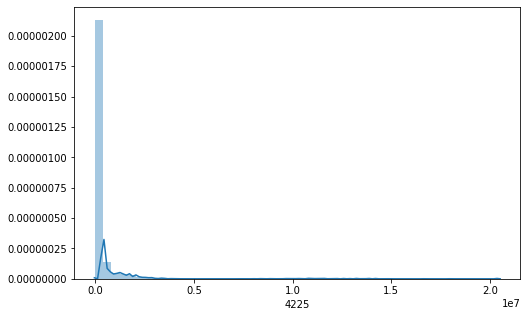

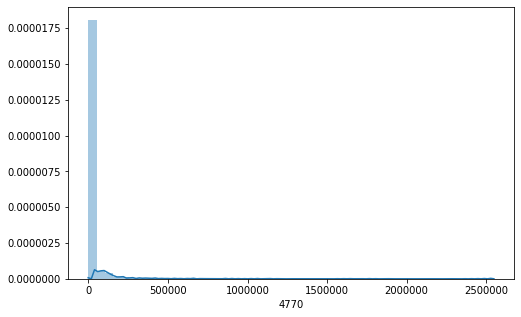

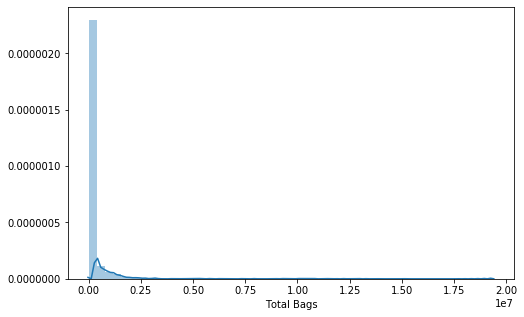

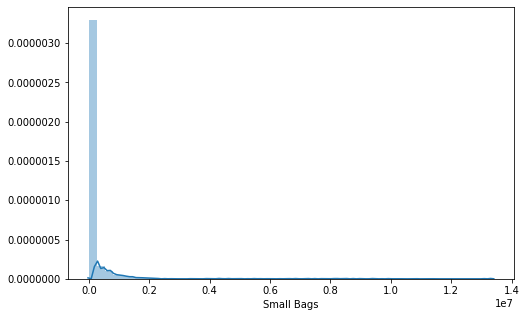

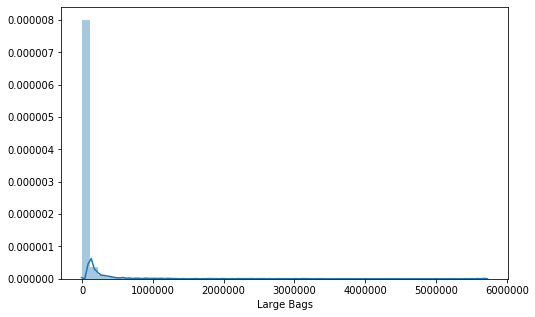

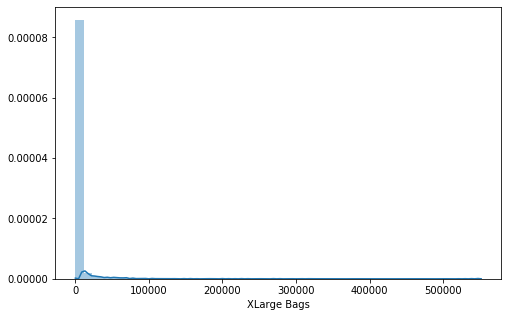

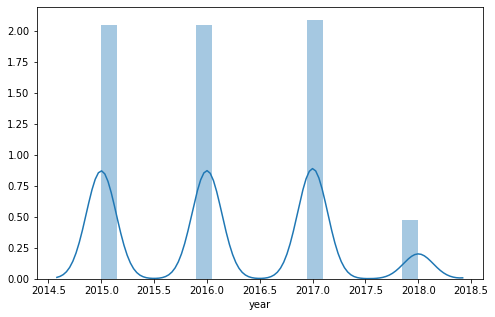

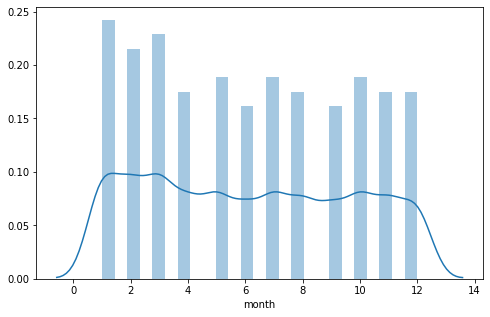

In [17]:
#Univariate analysis of Features except type column and region column
for i in data.columns:
    if data[i].dtypes != 'object':
        plt.figure(figsize=(8,5))
        sns.distplot(data[i])
        plt.show()

From the above graphs, we can see that the AveragePrice is almost normally distributed, however other inputs are Right skewed as we can see a long tail towards right.. We will later reduce the skweness for our model bultion using power transformation.
and Average Price from 1 to 1.4(approx) have the highest weigth.

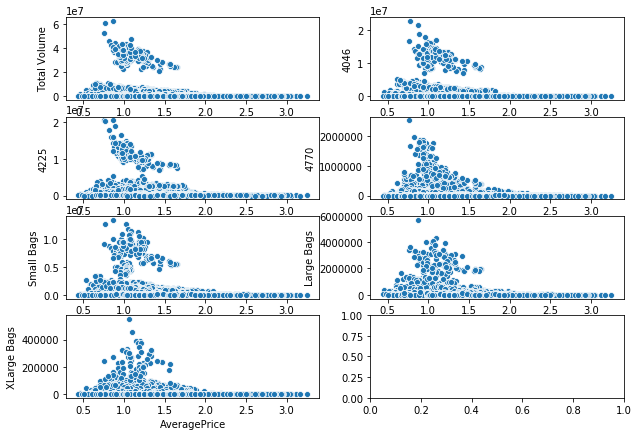

In [20]:
#checking out the relation between Average Price and Total Volume,
#4046,4225,4770,Small Bags,Large Bags,XLarge Bags
fig ,axes = plt.subplots(nrows=4,ncols=2,figsize=(10,7))
sns.scatterplot(x='AveragePrice',y='Total Volume',data=data,ax=axes[0,0])
sns.scatterplot(x='AveragePrice',y='4046',data=data,ax=axes[0,1])
sns.scatterplot(x='AveragePrice',y='4225',data=data,ax=axes[1,0])
sns.scatterplot(x='AveragePrice',y='4770',data=data,ax=axes[1,1])
sns.scatterplot(x='AveragePrice',y='Small Bags',data=data,ax=axes[2,0])
sns.scatterplot(x='AveragePrice',y='Large Bags',data=data,ax=axes[2,1])
sns.scatterplot(x='AveragePrice',y='XLarge Bags',data=data,ax=axes[3,0])


insights from the above graphs:

When the Average Price is from 0.9 to 1.6 the total volume sold was more, however that was only in case of Conventional type of Avocados. For Organic Type the volume was not varying much but the price was increasing.

4046 PLU (Price look up) :
max Avocados with plu 4046 sticker were sold when the Average price was ranging from 0.9 to 1.7.

4225  (Price look up) :
max Avocados with plu 4225 sticker were sold when the Average price was ranging from 0.7 to 1.4.

4770  (Price look up) :
max Avocados with plu 4770 sticker were sold when the Average price was ranging from 0.6 to 1.2.

Small Bags :
This refers to the sale of mixed PLU stickers Avocados, when the price was in range 0.8 to 1.3 the sale of Small Bags were more.

Large Bags:
Sale of Large Bags were more when the avg price was ranging from 0.8 to 1.5,and maximum at 0.9.

XLarge Bags:
Sale of Xlarge Bags was at peak when the Avg price was 1.2.
Sales were higher when the price range was 0.7 to 1.4

The price of Avocado gets affected very much due to the demand and supply, Its all seasonal Basis.

Unit sold for conventional type of avocados are high as compared to Organic.

# MULTIVARIATE ANALYSIS

In [21]:
#creating a num_var which will include all numerical continous data for pairplot

num_var = data.select_dtypes(['int64','float64'])
num_var.drop(['year','month'],axis=1,inplace=True)
num_var.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0


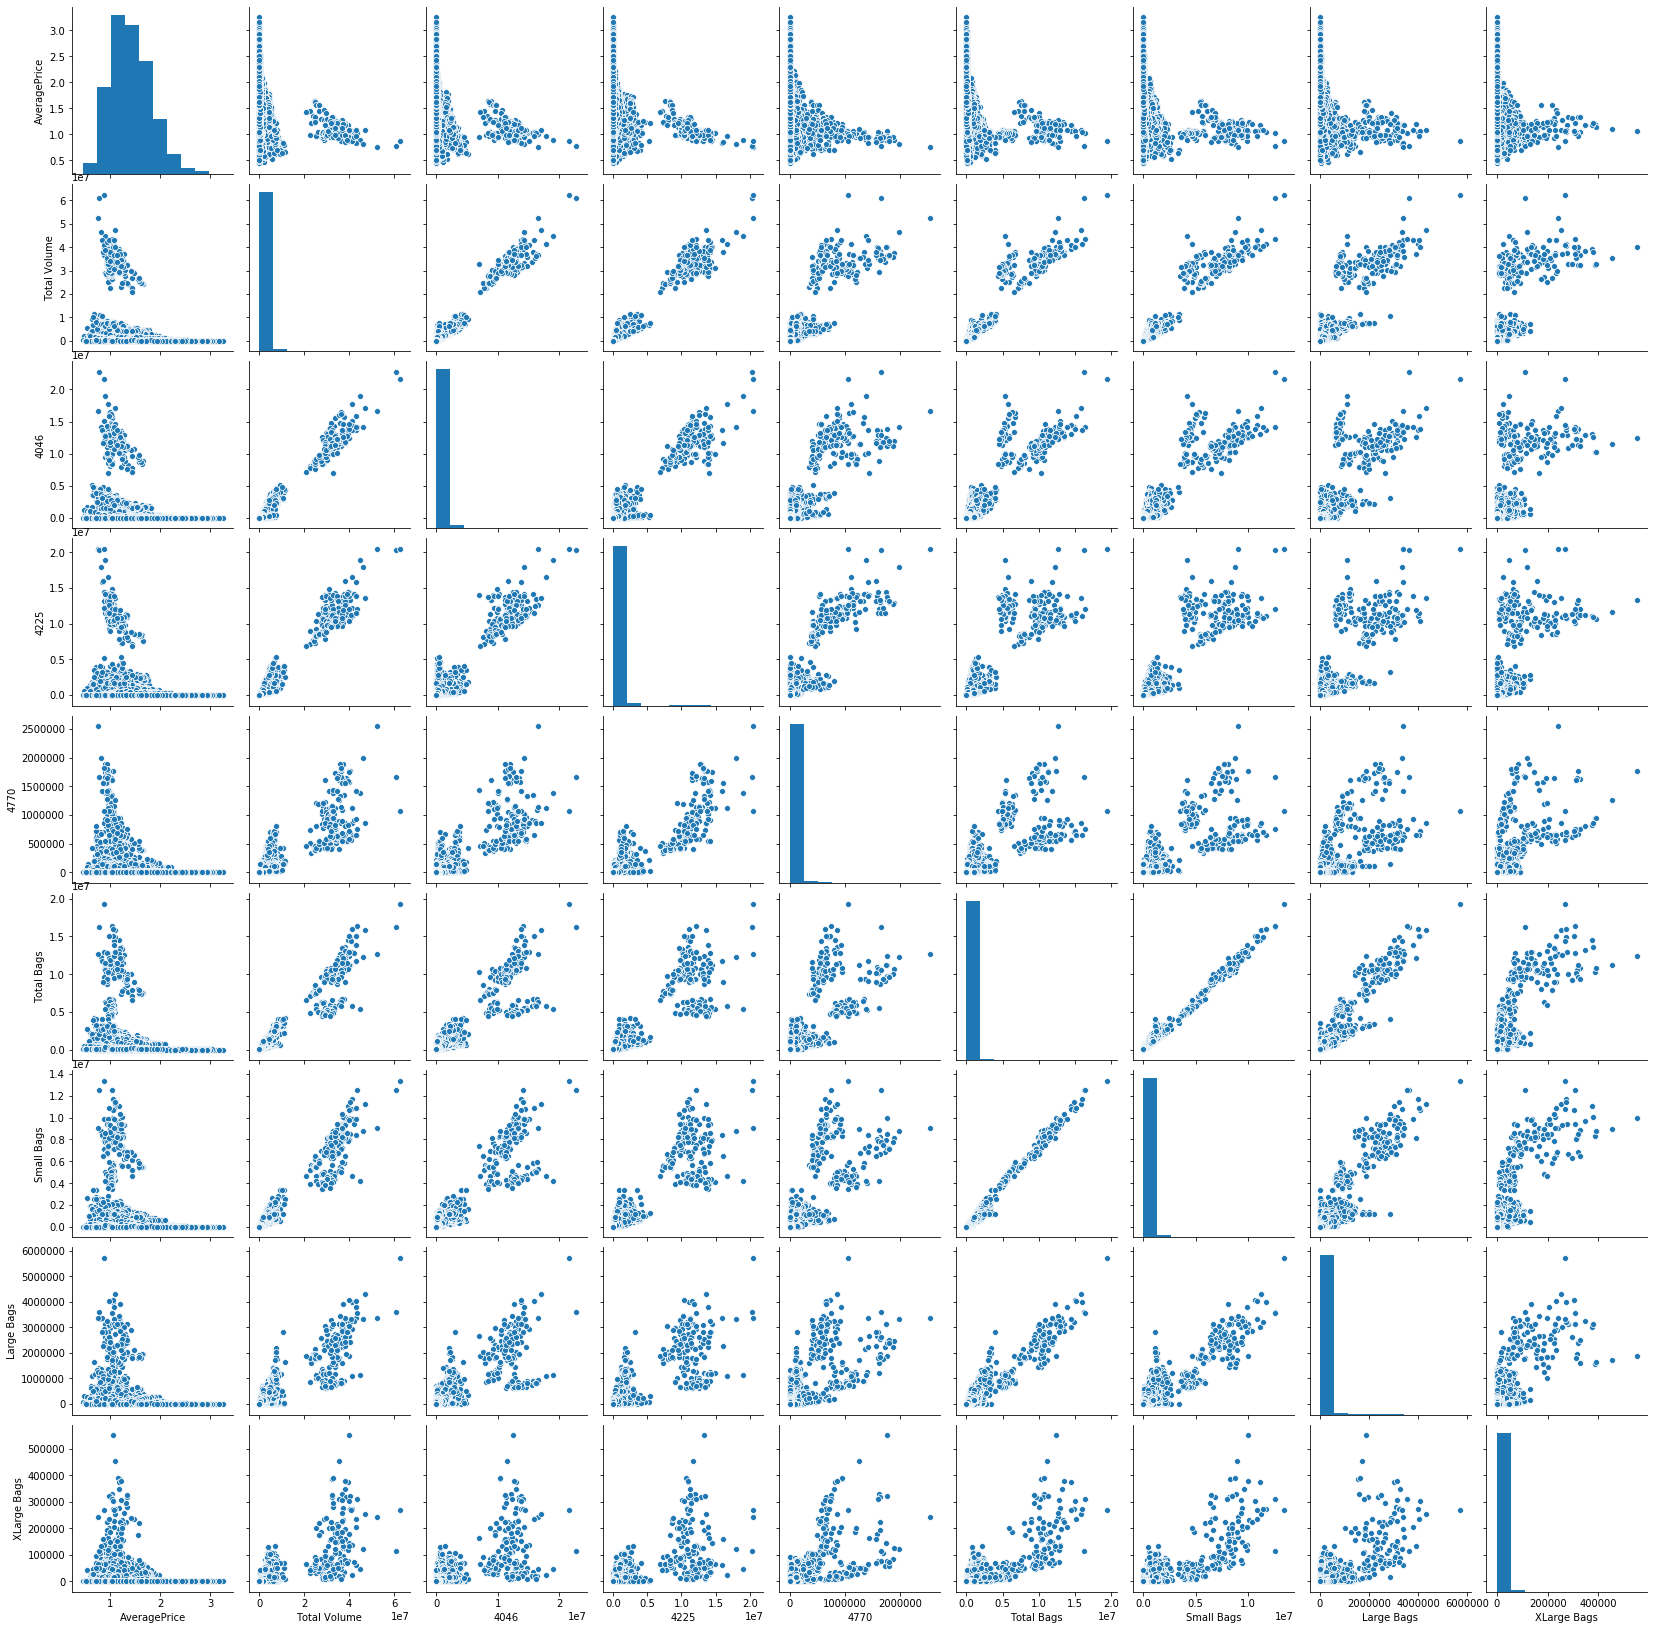

In [22]:
sns.pairplot(num_var)

# LABEL ENCODING

as we can see that we have columns named as 'type' and 'region' which are in object format, we will be converting them into numerical values using Label encoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
#converting type and region column using label encoder
data['type'] = le.fit_transform(data['type'])
data['region'] = le.fit_transform(data['region'])
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


# Outlier Detection

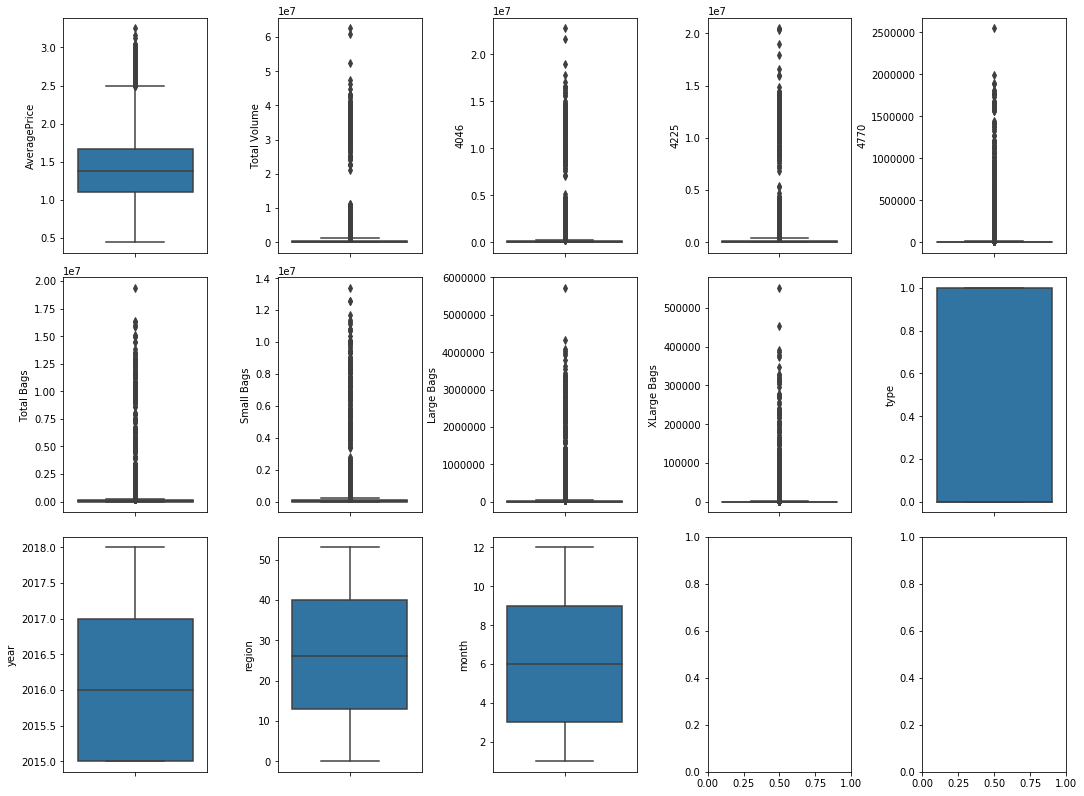

In [25]:

fig, ax = plt.subplots(ncols=5 ,nrows=3 , figsize=(15,11))
index = 0
ax = ax.flatten()

for i,value in data.items():
    sns.boxplot(y=i, data=data ,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, h_pad= 1, w_pad= 0.6)

we can see that the input variables surely have outliers, as we have also seen in the distplot features like (Total Volume	4046	4225	4770	Total Bags	Small Bags	Large Bags	XLarge Bags)
are left skewed so, it is proved that these features have some outliers, we will fix them

In [26]:
z = np.abs(zscore(data))
print(z)

[[0.18868864 0.22771641 0.23081597 ... 1.22128204 1.7002522  1.64763162]
 [0.13901962 0.23042664 0.23110251 ... 1.22128204 1.7002522  1.64763162]
 [1.18206895 0.21208462 0.23100731 ... 1.22128204 1.7002522  1.64763162]
 ...
 [1.15237477 0.24233073 0.2306933  ... 1.97050371 1.70081131 1.46495942]
 [1.30138182 0.24162464 0.2304279  ... 1.97050371 1.70081131 1.46495942]
 [0.53151208 0.24125273 0.22934712 ... 1.97050371 1.70081131 1.46495942]]


In [27]:
#now setting the threshold limit to 3, the reason being 99% of the data is in 3 standard deviation.

threshold = 3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [28]:
data_zout = data[(z<3).all(axis = 1)]
data_zout.shape

(17651, 13)

In [29]:
print("Shape of our old data :", data.shape)
print("Shape of our cleaned data :", data_zout.shape)

Shape of our old data : (18249, 13)
Shape of our cleaned data : (17651, 13)


# CORRELATION HEATMAP

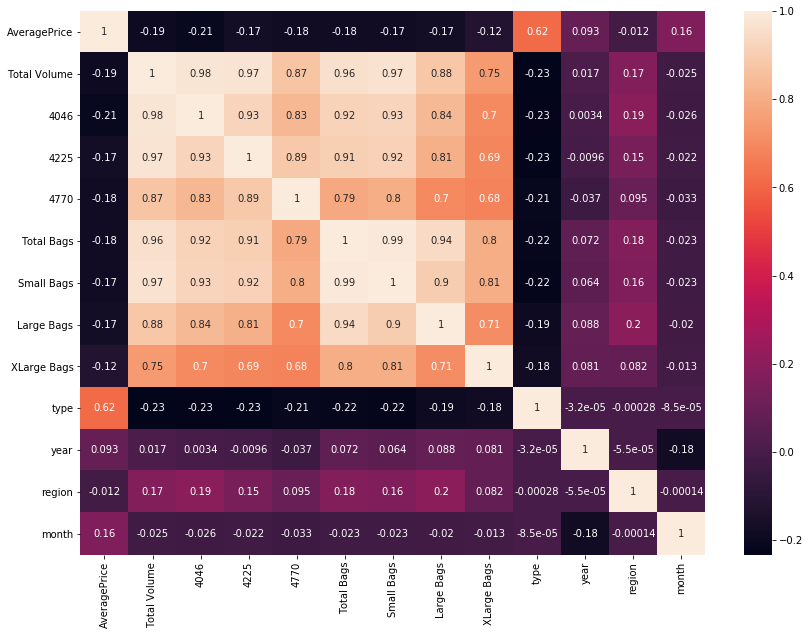

In [30]:
#plotting heatmap that will show the correlation of inputs and output variables.
data_cor = data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(data_cor,annot=True)
plt.show()

From here we can observe that most of the values are positive which shows that features are much correlated, however features does have negative correlation.
I will be using all my input features as I think these will provide better score for my model.
As we can see that the avocado type plays an important role in the price prediction, and type columnis again highly correlated to other features (Total Volume, 4046 PLU, 4255 PLU, 4770 PLU, Total Bags, Small Bags, Large Bags, XLarge Bags.

# CHECKING and FIXING DATA SKEWNESS

In [31]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
month            0.106617
dtype: float64

In [32]:
for col in data.columns:
    if data[col].skew()>0.55:
        data[col]=np.log1p(data[col])

In [33]:
data.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
month           0.106617
dtype: float64

# Splitting input and output data

In [34]:
x = data.drop('AveragePrice',axis=1)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11


In [35]:
y = data['AveragePrice']
y.head()

0    0.845868
1    0.854415
2    0.657520
3    0.732368
4    0.824175
Name: AveragePrice, dtype: float64

we have seperated input data as x, and Output data as y, later we will be using them for our model prediction

# Scaling the inputs

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()

In [38]:
x_sc = sc.fit_transform(x)
x_sc = pd.DataFrame(x_sc)
x_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.107282,-0.609752,0.374936,-0.279143,-0.494074,-0.247796,-0.669747,-0.645526,-0.999836,-1.221282,-1.700252,1.647632
1,-0.175949,-0.737707,0.305200,-0.233838,-0.454761,-0.213093,-0.658279,-0.645526,-0.999836,-1.221282,-1.700252,1.647632
2,0.158690,-0.688840,0.618892,-0.042078,-0.523041,-0.273995,-0.643743,-0.645526,-0.999836,-1.221282,-1.700252,1.647632
3,-0.017121,-0.583598,0.472808,-0.181974,-0.672335,-0.409182,-0.576571,-0.645526,-0.999836,-1.221282,-1.700252,1.647632
4,-0.207558,-0.638425,0.298852,-0.171717,-0.644845,-0.388616,-0.475393,-0.645526,-0.999836,-1.221282,-1.700252,1.364669


# Cross Validation test for best model

In [39]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [40]:
models = [RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),KNeighborsRegressor(),LinearRegression(),
         Lasso(),ElasticNet(),Ridge()]

for model in models:
    print("model name =",model)
    model.scores = cross_val_score(model, x_sc, y, cv=5)
    print('Model scores :',model.scores)
    print('Model mean score: ',model.scores.mean())
    print('Model std score :', model.scores.std())
    print('\n')
    

model name = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Model scores : [-0.11720108  0.45448419  0.67362471  0.21245541  0.02317532]
Model mean score:  0.24930771056270654
Model std score : 0.28599473758408456


model name = AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
Model scores : [-0.25664452  0.27963505  0.5683409   0.13478638  0.03843333]
Model mean score:  0.1529102293816541
Model std score : 0.2719596822049413


model name = GradientBoostingRegressor(a

From the above cross validation score , I find that Gradient Descent and Random forest regression are performing well, as compared to other models.

In [41]:
#trying with Gradient Descent
max_grd_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(x_sc,y,test_size=.33,random_state=r_state)
    grd = GradientBoostingRegressor()
    grd.fit(X_train,y_train)
    grd_pred = grd.predict(x_test)
    r2_scr = r2_score(y_test,grd_pred)
    if r2_scr>max_grd_score:
        max_grd_score=r2_scr
        final_r_state = r_state
        
print('max r2_score for the given ','', final_r_state, 'is', max_grd_score)

max r2_score for the given   94 is 0.77842281186068


In [61]:
#trying with Random fores regressor
max_rfr_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(x_sc,y,test_size=.33,random_state=r_state)
    rfr = RandomForestRegressor()
    rfr.fit(X_train,y_train)
    rfr_pred = rfr.predict(x_test)
    r2_scr = r2_score(y_test,rfr_pred)
    if r2_scr>max_rfr_score:
        max_rfr_score=r2_scr
        final_r_state = r_state
        
print('max r2_score for the given ','', final_r_state, 'is', max_rfr_score)

max r2_score for the given   84 is 0.8965939581770063


Great!, I will be creating a model using RandomForest. 

In [42]:
#gridsearch for best parameter tuning.

#param_grid = {
#    'bootstrap': [True],
#    'min_samples_leaf': [3, 4, 5],
#    'n_estimators': [10,20,30,40],
#    'criterion':['mse','mae']
#}



In [43]:
#grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid)

In [44]:
#grid_search.fit(x, y)
#grid_search.best_params_

I had to stop gridsearch cv process, As it was taking too much time to provide me the solution,
guess my PC is not able to process quickly.
I am now creating a Random Forest Regressor model

In [45]:
x_train,x_test,y_train,y_test= train_test_split(x_sc,y,test_size=.33,random_state=84)

In [46]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)


In [47]:
r2_scr = r2_score(y_test,rfr_pred)

In [48]:
print('Model accuracy')
print("Model's R2 Score :", r2_scr)
print("Model's MSE :", mean_squared_error(y_test,rfr_pred))
print("Model's MAE :",mean_absolute_error(y_test,rfr_pred))
print("Model's Root MSE :", np.sqrt(mean_squared_error(y_test,rfr_pred)))

Model accuracy
Model's R2 Score : 0.8956703539624202
Model's MSE : 0.0028119394062236396
Model's MAE : 0.037952136008742914
Model's Root MSE : 0.053027722996783856


Text(0.5, 1.0, 'Actual VS Predicted')

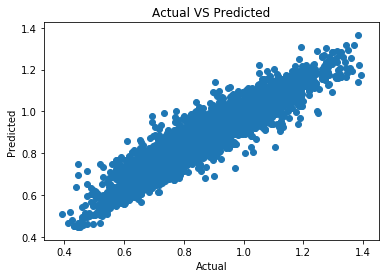

In [49]:
#plotting predicted vs actual values.

plt.scatter(x=y_test,y=rfr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

# IMPORTING CLASSIFICATION LIBRARIES

In [50]:
#now we have to build a classification model to predict the region/city
#as the region column is categorical in nature, we have 54 regions
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

In [51]:
#here our target variable will be region.
y_new = data['region']
y_new.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [52]:
x_new = data.drop('region',axis=1)
x_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,12
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,12
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,12
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,12
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,11


In [53]:
#using standard scaler on x_new data
x_new = sc.fit_transform(x_new)
x_new = pd.DataFrame(x_new)
x_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.111918,-0.107282,-0.609752,0.374936,-0.279143,-0.494074,-0.247796,-0.669747,-0.645526,-0.999836,-1.221282,1.647632
1,-0.060020,-0.175949,-0.737707,0.305200,-0.233838,-0.454761,-0.213093,-0.658279,-0.645526,-0.999836,-1.221282,1.647632
2,-1.255560,0.158690,-0.688840,0.618892,-0.042078,-0.523041,-0.273995,-0.643743,-0.645526,-0.999836,-1.221282,1.647632
3,-0.801087,-0.017121,-0.583598,0.472808,-0.181974,-0.672335,-0.409182,-0.576571,-0.645526,-0.999836,-1.221282,1.647632
4,-0.243636,-0.207558,-0.638425,0.298852,-0.171717,-0.644845,-0.388616,-0.475393,-0.645526,-0.999836,-1.221282,1.364669


In [54]:
#applying cross validation test for our classification model to predict region

clf_model = [RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),
             DecisionTreeClassifier(),MultinomialNB(),SVC()]

for cl_model in clf_model:
    print("model name =",cl_model)
    cl_model.scores = cross_val_score(cl_model, x_new, y_new, cv=5)
    print('Model scores :',cl_model.scores)
    print('Model mean score: ',cl_model.scores.mean())
    print('Model std score :', cl_model.scores.std())
    print('\n')

model name = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Model scores : [0.63616438 0.82547945 0.76547945 0.68876712 0.48095369]
Model mean score:  0.6793688193800516
Model std score : 0.11839499534058129


model name = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Model scores : [0.0369863  0.0539726  0.08493151 0.06       0.06412716]
Model mean score:  0.06000351381688359
Model std score : 0.01552142550

Here again, I see that the Random forest classifier giving us the best results, 
Building a model with random forest classifier

In [55]:
#trying with Random forest classifier
max_rfc_score = 0
for r_state in range(41,100):
    X_train,x_test,y_train,y_test= train_test_split(x_new,y_new,test_size=.33,random_state=r_state)
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(x_test)
    rfc_scr = accuracy_score(y_test,rfc_pred)
    if rfc_scr>max_rfc_score:
        max_rfc_score=rfc_scr
        final_r_state = r_state
        
print('max r2_score for the given ','', final_r_state, 'is', max_rfc_score)

max r2_score for the given   62 is 0.91598870994521


In [56]:
#here r2_score means the accuracy score

#now building the final model

In [57]:
#gridsearch CV, creating a param_grid for gridsearchCV
param_grid = {'ccp_alpha': [0.001, 0.01, 0.1, 1, 10] }


In [58]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid)

In [59]:
grid_search.fit(x_new,y_new)
grid_search.best_params_

{'ccp_alpha': 0.001}

# Final Model Building

In [60]:
X_train_new,x_test_new,y_train_new,y_test_new= train_test_split(x_new,y_new,test_size=.33,random_state=66)

rfc_new = RandomForestClassifier(ccp_alpha=0.001)

In [61]:
rfc_new_model = rfc_new.fit(X_train_new,y_train_new)
rfc_pred_new = rfc_new.predict(x_test_new)

Accuracy = accuracy_score(y_test_new,rfc_pred_new)
con_mat = confusion_matrix(y_test_new,rfc_pred_new)
clas_rprt = classification_report(y_test_new,rfc_pred_new)

In [ ]:
#we see that changing the parameter grid of cc_alpha is not giving he best result. so we will use default value of cc_alpha.

In [68]:
X_train_new,x_test_new,y_train_new,y_test_new= train_test_split(x_new,y_new,test_size=.33,random_state=66)

fin_rfc = RandomForestClassifier()
fin_new_model = fin_rfc.fit(X_train_new,y_train_new)
fin_pred = fin_rfc.predict(x_test_new)

Accuracy = accuracy_score(y_test_new,fin_pred)
con_mat = confusion_matrix(y_test_new,fin_pred)
clas_rprt = classification_report(y_test_new,fin_pred)

In [69]:
print('Accuracy score of our model is :', Accuracy)

Accuracy score of our model is : 0.9144944379877138


In [70]:
print('Confusion metrix of our model is :')

con_mat

Confusion metrix of our model is :


array([[104,   0,   0, ...,   0,   0,   0],
       [  0,  92,   0, ...,   0,   0,   0],
       [  0,   0, 107, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 109,   0,   0],
       [  0,   0,   0, ...,   0, 124,   0],
       [  0,   0,   1, ...,   0,   0,  94]], dtype=int64)

In [71]:
print('Classification report of our model is:',clas_rprt)



Classification report of our model is:               precision    recall  f1-score   support

           0       0.87      0.94      0.90       111
           1       0.86      0.85      0.86       108
           2       0.94      0.97      0.96       110
           3       0.91      0.91      0.91       100
           4       0.92      0.99      0.95       109
           5       0.93      0.82      0.87       102
           6       1.00      1.00      1.00       121
           7       0.89      0.91      0.90       105
           8       0.98      0.99      0.98       121
           9       0.90      0.90      0.90       124
          10       0.87      0.89      0.88       118
          11       0.92      0.94      0.93       112
          12       0.98      0.95      0.96       112
          13       0.93      0.88      0.90       114
          14       0.94      0.89      0.92       112
          15       0.97      1.00      0.98       118
          16       0.98      0.94      0.9

In [72]:
#saving redicted file into csv format
fin_pred

array([35, 23, 38, ..., 19, 34,  5])

In [75]:
result = pd.DataFrame(fin_pred)
result.head()

,0
0,35
1,23
2,38
3,8
4,18


In [76]:
result.index = x_test.index # its important for comparison
result.columns = ["prediction"]
result.to_csv("prediction_results.csv")

In [77]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rfr_pred,'Avocado.pkl')

['Avocado.pkl']